<a href="https://www.kaggle.com/code/ksenia5/natural-language-toolkit-getting-started?scriptVersionId=111629265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction to NLP with NLTK

The [NLTK book](https://www.nltk.org/book/) is followed as a guide to natural language processing. The aim is to become familiar with the NLP tools in the NLTK library. Selected examples and exercise from the first three chapters are covered, as follows:

1. Language Processing in Python
<br><br>
Initial exploration of textual data by calculating lexical diversity and visualising word occurrence with dispersion plots and calculating basic statistics

2. Accessing Text Corpora and Lexical Resources

3. Processing Raw Text


## 1. Language processing and python

Load the nltk library, books and text corpuses.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Pandas and print rounding
pd.set_option('precision', 3) 
%precision 3

# Language resources from NLTK
import nltk # library
from nltk.book import *
from nltk.corpus import brown

# NLTK module with texts
# from nltk import book 

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
print(type(text1))
text1[:10]

<class 'nltk.text.Text'>


['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

The NLTK text object is a list of tokens.

### Initial text exploration
* concordance - shows every occurrence of a given word along with some context
* similar - shows words in a similar range of contexts
* common_contexts - examine contexts shared by two or more words
* dispersion_plot - displays the location of every word occurrence within the length of the text
* generate - produce random text in the style of a given text (using ngrams)
<br><br>

#### The generate method creates a random string in the style of the text
The method uses n-grams.


In [3]:
# length - number of tokens - words and punctuation - in the string
# text seed - starting text
sample = text1.generate(length = 50, text_seed = "sky", random_seed = 42)

Building ngram index...


s k y ' ge of his present irreverence , quietly hauling in the left hand ,
mounted the deck . ! ! ! ' ge of his crew . ! ' ge of his utilitarian
character . ! ! ! ' ge of his very much such a yawning commander , by


##  Calculate basic text statistics: text length, vocabulary size and lexical diversity

* A [**corpus**](https://www.nltk.org/book/ch02.html) is a **large body of linguistic data**.

* A **token** is a **sequence of characters - words or punctuation symbols**.

* **Text length** is the **total number of tokens used** in the text.

* **Vocabulary size** is the number of unique token used within the text.

* **Lexical diversity** is a measure of lexical richness; calculated as the ratio of unique tokens to the total number of tokens.


In [4]:
word_count = len(text1)
unique_word_count = len(set(text1))
lexical_diversity = unique_word_count/word_count

# Display unique words sorted in alphabetical order using 
# sorted(set(text1))

print("Word count: {} \nUnique word count: {} \nLexical diversity: {:.4f}".format(word_count, unique_word_count, lexical_diversity))

Word count: 260819 
Unique word count: 19317 
Lexical diversity: 0.0741


### Q.1.5  and 2.16
* Comparing the lexical diversity scores for humor and romance fiction, to assess which genre is more lexically diverse.
* Define a function to calculate lexical diversity of a given text.
* Use the function to analyse different categories within the Brown corpus.

In [5]:
# Function takes NLTK text object in a given category

def lexical_diversity(text,category=None):
    
    '''Returns tokens, type and lexical diveristy of a given text'''
    
    tokens = len(text) 
    # Convert titlecase to lowercase to avoid doublecounting words at the start of the sentence
    words = []
    for token in text:
        if token.istitle():
            words.append(token.lower())
        else:
            words.append(token)    
    types = len(set(words))
    ld = types / tokens
    
    # Return the number of tokens, types and lexical diversity computed
    return tokens, types, ld

In [6]:
# Calculate lexical diversity for each category of text within the Brown corpus
ld_table = dict()

for cat in brown.categories():
    tokens, types, ld = lexical_diversity(brown.words(categories = cat), str(cat))
    ld_table[cat] = [tokens, types, ld]

ld_series = pd.DataFrame.from_dict(ld_table, orient='index') 
ld_series.index.name = "Genre"
ld_series.columns = ["Tokens", "Types", "Lexical Diversity"]
ld_series = ld_series.sort_values(by = "Lexical Diversity", ascending = False)
ld_series

# another way to make dataframe from dictionary
#ld_series = pd.DataFrame(list(ld_table.items), columns = ["Genre", "Lexical Diversity"])
#ld_series.set_index("Genre", inplace= True)


,Tokens,Types,Lexical Diversity
Genre,,,
humor,21695,4765,0.220
science_fiction,14470,3040,0.210
reviews,40704,8076,0.198
religion,39399,5936,0.151
editorial,61604,9130,0.148
hobbies,82345,10849,0.132
news,100554,13159,0.131
fiction,68488,8709,0.127
lore,110299,13434,0.122


The **humour** category has the **highgest lexical diversity** of all genres in the Brown corpus, followed by science fiction, reviews and religion. Coincidentally these categories are also ones with the lowest text lenght, indicating the texts are concise and lexically rich. **Romanace has a lexical diversity half that of humour**.

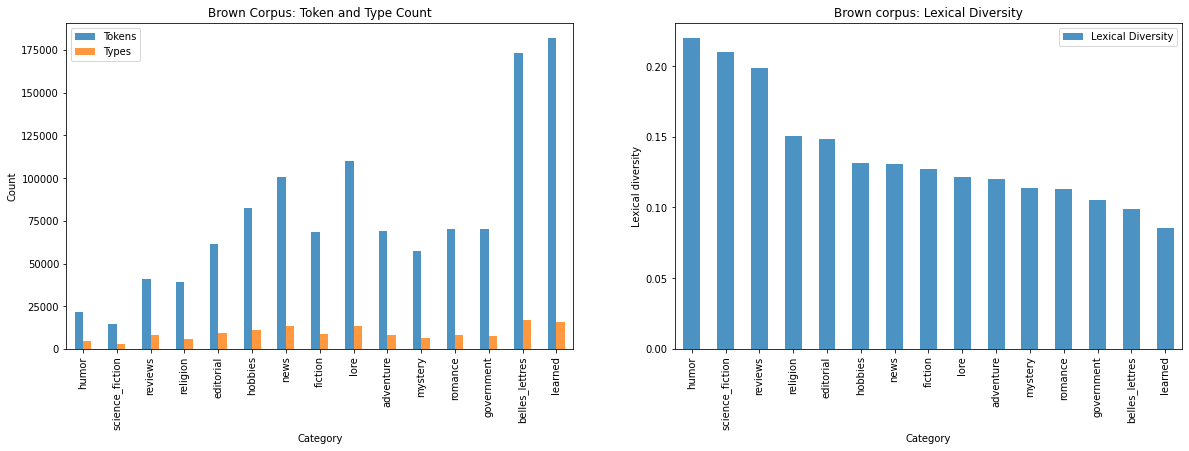

In [7]:
# Plot bar chart to display lexical diversity of each category

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: barplot of tokens and types
ld_series[["Tokens","Types"]].plot(kind='bar', figsize=(20, 6), ax=ax0, alpha = 0.8) # add to subplot 1
ax0.set_title('Brown Corpus: Token and Type Count')
ax0.set_xlabel('Category')
ax0.set_ylabel('Count')

# Subplot 2: barplot of lexical diversity
ld_series[["Lexical Diversity"]].plot(kind='bar', figsize=(20, 6), ax=ax1, alpha = 0.8) # add to subplot 2
ax1.set_title ('Brown corpus: Lexical Diversity')
ax1.set_xlabel('Category')
ax1.set_ylabel('Lexical diversity')

plt.show()

The barchart shows the number of tokens and types for each genre, and it's clear that the categories vary in length significantly. Lexical diversity is not visible on the same scale.

In [8]:
# normalise data to see the ratio of tokens to types and lexical diversity 
# the length of text for each category is set to 1.
normalised_series = pd.DataFrame()
normalised_series["Tokens"] = ld_series["Tokens"] / ld_series["Tokens"]
normalised_series["Types"] = ld_series["Types"] / ld_series["Tokens"]
normalised_series["Non_unique"] = normalised_series["Tokens"] - normalised_series["Types"]
normalised_series.head()

,Tokens,Types,Non_unique
Genre,,,
humor,1.0,0.220,0.780
science_fiction,1.0,0.210,0.790
reviews,1.0,0.198,0.802
religion,1.0,0.151,0.849
editorial,1.0,0.148,0.852


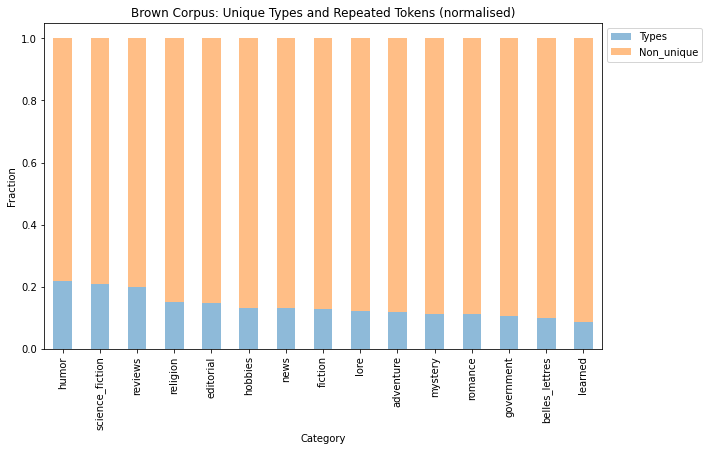

In [9]:
# stacked bar plot
normalised_series[["Types","Non_unique"]].plot(kind='bar',
                                               figsize=(10, 6), 
                                               alpha = 0.5,
                                               stacked=True
                                              )

plt.title('Brown Corpus: Unique Types and Repeated Tokens (normalised)')
plt.ylabel('Fraction')
plt.xlabel('Category')

#place legend in top right corner
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
# plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)

plt.show()

The type fraction is now equal to lexical diversity; the proportion of non-unique tokens is shown in orange.

To understand better the structure of the Brown corpus and its categories, check the number of files and words in each category, e.g. for humour:

In [10]:
n_files_comedy = len(brown.fileids(categories='humor'))
n_words_comedy = len(brown.words(categories='humor'))
print("The humor category of the Brown corpus has {} files with a total of {} words.".format(n_files_comedy, n_words_comedy))

The humor category of the Brown corpus has 9 files with a total of 21695 words.


### Calculating word percentages

#### Q.1.28 
Defining a function percent(word, text) that calculates how often a given word occurs in a text, and expresses the result as a percentage.

In [11]:
# Create a function to calculate the percentage of text taken up by a given word
def percent(word = None, text = None):
    w_percent = 100*text.count(word)/len(text)
    print("The word <{}> accounts for {:.2f}% of the {}".format(word, w_percent, text))

In [12]:
# check the percentage of text due to the word "sea"
percent("sea",text1)
percent("whale",text1)
percent("ship",text1)

The word <sea> accounts for 0.17% of the <Text: Moby Dick by Herman Melville 1851>
The word <whale> accounts for 0.35% of the <Text: Moby Dick by Herman Melville 1851>
The word <ship> accounts for 0.19% of the <Text: Moby Dick by Herman Melville 1851>


## Dispersion plots
**Dispersion plots** show the **location of words within the text**, where each row represents the entire length of the text. Here the appearance of four characters within the novel Sense and Sensibility is explored briefly.

#### Q.1.6 
Producing a dispersion plot of the four main protagonists in Sense and Sensibility (text2) - Elinor, Marianne, Edward and Willoughby. 
* What can be observed about the different roles played by the males and females in this novel?
* Can the couples be identified?


<Text: Sense and Sensibility by Jane Austen 1811>


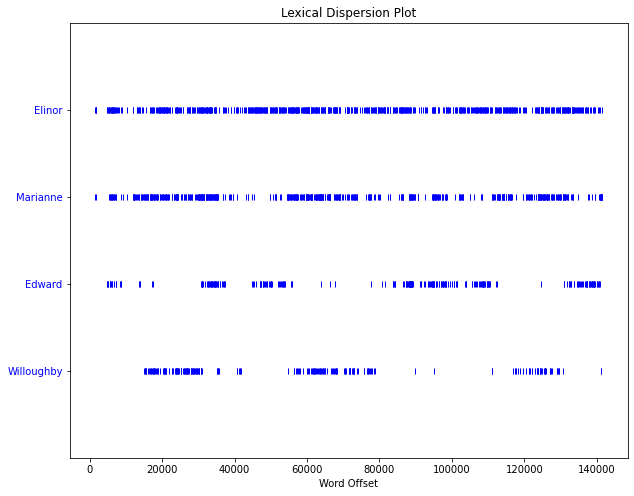

In [13]:
from IPython.display import display
plt.figure(figsize=(10, 8))
print(text2)
text2.dispersion_plot(["Elinor","Marianne","Edward", "Willoughby"])

The dispersion plot shows the appearance of four characters with the novel Sense and Sensibility. 
<br><br>

The two female characters Elinor and Marianne appear frequently and consistently throughout the narrative, indicating they are the lead characters, with Elinor mentioned most. Edward and Willoughby appear at intervals indicating their important yet secondary roles. They appear at different times to each other suggesting the two male characters do not have a direct relationship.
<br><br>

The appearance of Elinor and Edward coincide frequently in time, indicating a relationship, similarly Marianne and Willoughby's appearance is concommitant suggestive of a relationship between the two.

**Collocations** are **sequences of words that occur frequently together** i.e. collocations of length two are frequently occurring bigrams.


### Q.1.7 
Finding the collocations in text5

In [14]:
print(text5)
text5.collocations(num = 20, window_size = 2)

<Text: Chat Corpus>
wanna chat; PART JOIN; MODE #14-19teens; JOIN PART; PART PART;
cute.-ass MP3; MP3 player; JOIN JOIN; times .. .; ACTION watches; guys
wanna; song lasts; last night; ACTION sits; -...)...- S.M.R.; Lime
Player; Player 12%; dont know; lez gurls; long time


### Text as a list of words

In [15]:
# Create a string
saying = "After all is said and done more is said than done"

# Split into a list of words
saying = saying.split()

# Vocab 
tokens = set(saying)

# Vocab in alphebetical order
tokens = sorted(tokens)

# The last two tokens
tokens[-2:]

['said', 'than']

#### Q.1.21 
A slice expression that extracts the last two words of text2

In [16]:
print(text2)

# The last two words of the text
text2[-2:]


<Text: Sense and Sensibility by Jane Austen 1811>


['THE', 'END']

#### Q.1.22 
* Finding all the four-letter words in the Chat Corpus (text5)
* With the help of a frequency distribution (FreqDist) show these words in decreasing order of frequency

In [17]:
# Only select words made of letters - ignore if punctuation or digits are present
four_letter_words = [w.lower() for w in text5 if len(w) == 4 and w.isalpha()]

# Print the first 10 four-letter words
print(four_letter_words[:10],"\n")

fdist5 = FreqDist(four_letter_words)

print("There are {} four-letter words in {}.\n".format(len(four_letter_words),text5))

# Showing the top 10 most frequent words
print("The most frequent four-letter words are:")
fdist5.most_common(10)


['left', 'with', 'this', 'name', 'part', 'well', 'nick', 'name', 'golf', 'clap'] 

There are 9371 four-letter words in <Text: Chat Corpus>.

The most frequent four-letter words are:


[('part', 1022),
 ('join', 1021),
 ('that', 284),
 ('what', 201),
 ('here', 185),
 ('have', 171),
 ('like', 160),
 ('with', 154),
 ('chat', 146),
 ('your', 142)]

#### Q.1.25 
Define sent to be the list of words ['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']. Now write code to perform the following tasks:
<br>
a) Print all words beginning with sh
<br>
b) Print all words longer than four characters

In [18]:
sent = ['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']
# words beginning with sh
words = [w for w in sent if w.startswith("sh")]
print(words)

# words longer than four characters
words = [w for w in sent if len(w) >4]
print(words)

['she', 'shells', 'shore']
['sells', 'shells', 'shore']


## 2. Accessing Text Corpora and Lexical resources

In [19]:
from nltk.corpus import gutenberg

# Number of texts in the nltk Gutenberg corpus
len(gutenberg.fileids())

18

The NLTK Gutenberg corpus has 18 files. For each file calculate average word and sentence length, and the average number of times each word is used.

In [20]:
# View summary statistics for each fileid 
# letters/word, words/sentence, sentences/paragraph, average number of times each word is used
text_summary = {}
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_paras = len(gutenberg.paras(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid) if w.isalpha()))
    text_summary[fileid] = [num_chars/num_words,num_words/num_sents,num_sents/num_paras,num_words/num_vocab]
    #print(round(num_chars/num_words), round(num_words/num_sents), round(num_sents/num_paras), round(num_words/num_vocab), fileid)
    

In [21]:
# Make a dataframe of results
pd.set_option('precision', 1) 
text_summary = pd.DataFrame.from_dict(text_summary,orient='index', columns = ["Letters/word", "Words/Sentence","Sentences/Paragraph","Ave word use"])
text_summary.head()

,Letters/word,Words/Sentence,Sentences/Paragraph,Ave word use
austen-emma.txt,4.6,24.9,3.3,27.2
austen-persuasion.txt,4.7,26.2,3.6,17.1
austen-sense.txt,4.8,28.3,2.7,22.5
bible-kjv.txt,4.3,33.6,1.2,80.4
blake-poems.txt,4.6,19.1,1.5,5.5


#### Q.2.2
* Using the corpus module to explore austen-persuasion.txt. 
* How many word tokens does this book have? 
* How many word types?

In [22]:
# 'austen-persuasion.txt' is the second text
# To access text as a list of words or punctuations (tokens)
persuasion = gutenberg.words('austen-persuasion.txt')
n_tokens = len(persuasion)
n_types = len(set(persuasion))
print("There are {} tokens and {} types in the text.".format(n_tokens, n_types))


There are 98171 tokens and 6132 types in the text.


In [23]:
# Convert all words to lowercase and remove punctuation, to avoid double counting words at the start of the sentence
word_tokens = [w.lower() for w in persuasion if w.isalpha()]
n_word_tokens = len(word_tokens)
word_types = sorted(set(word_tokens))
n_word_types = len(word_types)
#word_types
print("There are {} words (word tokens) and {} unique words (lowercase word types) in the text.".format(n_word_tokens, n_word_types))

There are 84121 words (word tokens) and 5739 unique words (lowercase word types) in the text.


In [24]:
# Access raw text as a string - sequence of characters including white space
persuasion_raw = gutenberg.raw('austen-persuasion.txt')
print(persuasion_raw[:300])

[Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusement, never took up any book but the Baronetage;
there he found occupation for an idle hour, and consolation in a
distressed one; there his faculties were roused into


#### Q.2.3 
* Use the Brown corpus reader nltk.corpus.brown.words() or the Web text corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres.

In [25]:
# Accessing the Brown corpus (500 files)
# To view the number of files within the Brown corpus
# len(nltk.corpus.brown.fileids())
brown_genres = nltk.corpus.brown.categories()
#nltk.corpus.brown.words()

# display the first 10 words of the first 3 files for each genre
for genre in brown_genres:
    for fileid in nltk.corpus.brown.fileids(categories = genre)[:3]:
        print(genre, nltk.corpus.brown.words(fileid)[:10])
    print("\n")

adventure ['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner', '.']
adventure ['Gavin', 'paused', 'wearily', '.', '``', 'You', "can't", 'stay', 'here', 'with']
adventure ['The', 'sentry', 'was', 'not', 'dead', '.', 'He', 'was', ',', 'in']


belles_lettres ['Northern', 'liberals', 'are', 'the', 'chief', 'supporters', 'of', 'civil', 'rights', 'and']
belles_lettres ['In', 'the', 'past', ',', 'the', 'duties', 'of', 'the', 'state', ',']
belles_lettres ['Can', 'thermonuclear', 'war', 'be', 'set', 'off', 'by', 'accident', '?', '?']


editorial ['Assembly', 'session', 'brought', 'much', 'good', 'The', 'General', 'Assembly', ',', 'which']
editorial ['Must', 'Berlin', 'remain', 'divided', '?', '?', 'The', 'inference', 'has', 'been']
editorial ['A', 'good', 'man', 'departs', '.', 'Goodby', ',', 'Mr.', 'Sam', '.']


fiction ['Thirty-three', 'Scotty', 'did', 'not', 'go', 'back', 'to', 'school', '.', 'His']
fiction ['Where', 'their', 'sharp', 'edges', 'seemed', 'restless', 

The NLTK webtext corpus contains less formal natural language, inlcuding text from a Firefox discussion forum, conversation overheard in New York,the Pirates of the Carribean film script, personal ads and wine reviews.

In [26]:
# Accessing the webtext corpus (6 files)
# To view fileids
nltk.corpus.webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [27]:
# For every file id in the web text corpus print the first 300 characters
for fileid in nltk.corpus.webtext.fileids():
    print(fileid, "\n", nltk.corpus.webtext.raw(fileid)[:150], "\n")

firefox.txt 
 Cookie Manager: "Don't allow sites that set removed cookies to set future cookies" should stay checked
When in full screen mode
Pressing Ctrl-N shou 

grail.txt 
 SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther 

overheard.txt 
 White guy: So, do you have any plans for this evening?
Asian girl: Yeah, being angry!
White guy: Oh, that sounds good.

Guy #1: So this Jack guy is ba 

pirates.txt 
 PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terry Rossio
[view looking straight down at rolling swells, sound of wind and thunder, th 

singles.txt 
 25 SEXY MALE, seeks attrac older single lady, for discreet encounters.
35YO Security Guard, seeking lady in uniform for fun times.
40 yo SINGLE DAD, s 

wine.txt 
 Lovely delicate, fragrant Rhone wine. Polished leather and strawberries. Perhaps a bit dilute, but good for drinking now. ***
Liquorice, cherry fruit. 



In [28]:
# For every file id in the web text corpus print the file id and the first 30 words
'''
for fileid in nltk.corpus.webtext.fileids():
    print(fileid,"\n", " ".join(nltk.corpus.webtext.words(fileid)[:30]),"\n")
'''

'\nfor fileid in nltk.corpus.webtext.fileids():\n    print(fileid,"\n", " ".join(nltk.corpus.webtext.words(fileid)[:30]),"\n")\n'

In [29]:
# Store fileids
filenames = nltk.corpus.webtext.fileids()

# Create a dictionary of webtexts
web_texts = {}
for fname in filenames:
    web_texts[fname[:-4]] = nltk.corpus.webtext.words(fname)

# Display text as a list of words
web_texts["overheard"]

['White', 'guy', ':', 'So', ',', 'do', 'you', 'have', ...]

Converting each text to an [object of class text](https://www.nltk.org/api/nltk.text.html#module-nltk.text) gives access to Text class methods, e.g.: 
* concordance() 
* similar() 
* collocations() 
* generate()
* dispersion_plot()

In [30]:
# Store fileids
filenames = nltk.corpus.webtext.fileids()

# Create a dictionary of webtexts, where each value stores the text as an object of class Text
web_texts_2 = {}
for fname in filenames:
    web_texts_2[fname[:-4]] = nltk.Text(nltk.corpus.webtext.words(fname))
web_texts_2["pirates"].collocations()

JACK SPARROW; ELIZABETH SWANN; DAVY JONES; CUTLER BECKETT; LORD
CUTLER; Black Pearl; Flying Dutchman; TIA DALMA; Jack Sparrow;
CANNIBAL ISLAND; FLYING DUTCHMAN; Davy Jones; bamboo pole; Edinburgh
Trader; Port Royal; BLACK PEARL; East India; India Trading; PORT
ROYAL; Trading Company


Visualising the occurrence of some words within the text.

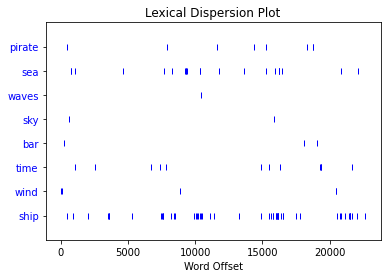

In [31]:
# nltk.corpus.webtext.words() 
# produces a list of tokens

# Produces an object of class nltk.text.Text
web_text = nltk.Text(nltk.corpus.webtext.words("pirates.txt"))
web_text.dispersion_plot(["pirate","sea","waves","sky","bar","time","wind","ship"])

#percent("you", web_text)
#len(web_text)


#### Q.2.4
Read in the texts of the State of the Union addresses, using the state_union corpus reader. 
* Count occurrences of men, women, and people in each document. 
* What has happened to the usage of these words over time?

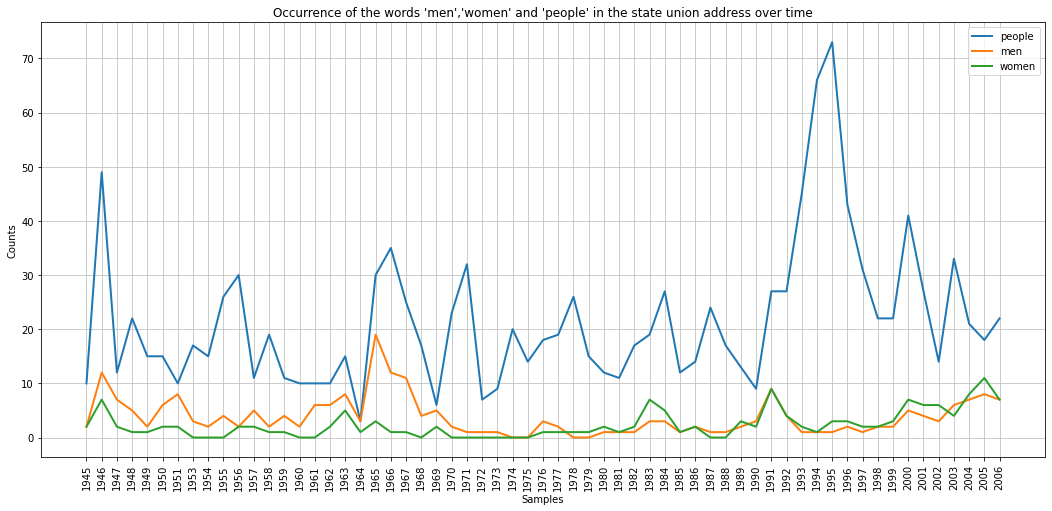

<AxesSubplot:title={'center':"Occurrence of the words 'men','women' and 'people' in the state union address over time"}, xlabel='Samples', ylabel='Counts'>

In [32]:
state_union = nltk.corpus.state_union
len(state_union.fileids())
# state_union.fileids()
plt.figure(figsize=(18, 8))
plt.title("Occurrence of the words 'men','women' and 'people' in the state union address over time")
cfd = nltk.ConditionalFreqDist(
    (target,fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ["men","women","people"]
    if w.lower()==target)
cfd.plot()


Before 1978 "men" appeared more frequently than "women", since then "women" appared slightly more than "men" in the presidential speeches.

### Names corpus
The names corpus has 8000 names in two data files - male and female.

In [33]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

#### Q.2.8
Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs females (cf [4.4](https://www.nltk.org/book/ch02.html#fig-cfd-gender)).

In [34]:
# Create lists of female and male names
f_names = names.words("female.txt")
m_names = names.words("male.txt")

# Calculate the number of female and male names
n_female =len(f_names)
n_male = len(m_names)
print("There are {} female and {} male names.".format(n_female, n_male))
print("Female and male names make up {:.1f} and {:.1f}% of the corpus.".format(100*n_female/(n_female+n_male), 100*n_male/(n_female+n_male)))

There are 5001 female and 2943 male names.
Female and male names make up 63.0 and 37.0% of the corpus.


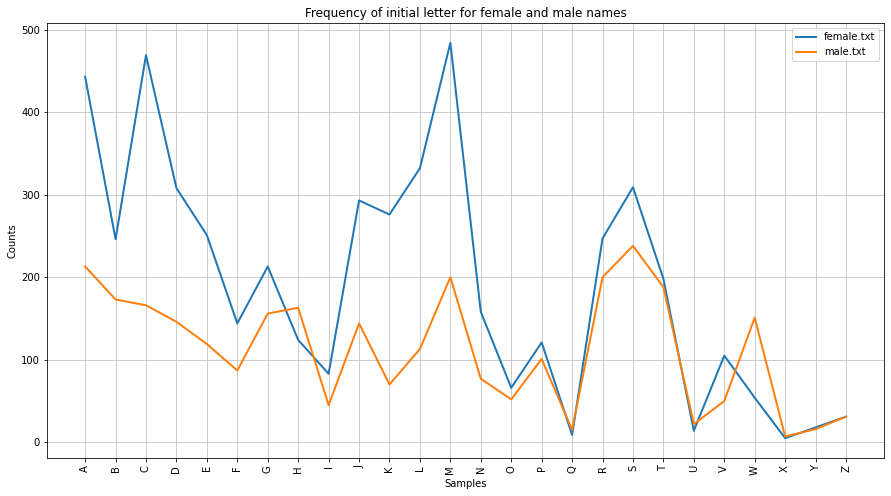

In [35]:
cfd_names = nltk.ConditionalFreqDist((fileid,name[0])
                                    for fileid in names.fileids()
                                    for name in names.words(fileid))
plt.figure(figsize=(15, 8))
plt.title("Frequency of initial letter for female and male names")

cfd_names.plot()
plt.show()

* The graphs show that the most popular female names start with C, M and A, whereas the most popular male names start with S, A and M.
* The graph shows that female names starting with most letters outnumber male names for each letter, except for H, Q, U and X.

As the corpus is biased towards female names (63% of entries), conditional frequencies can be normalised for each gender.

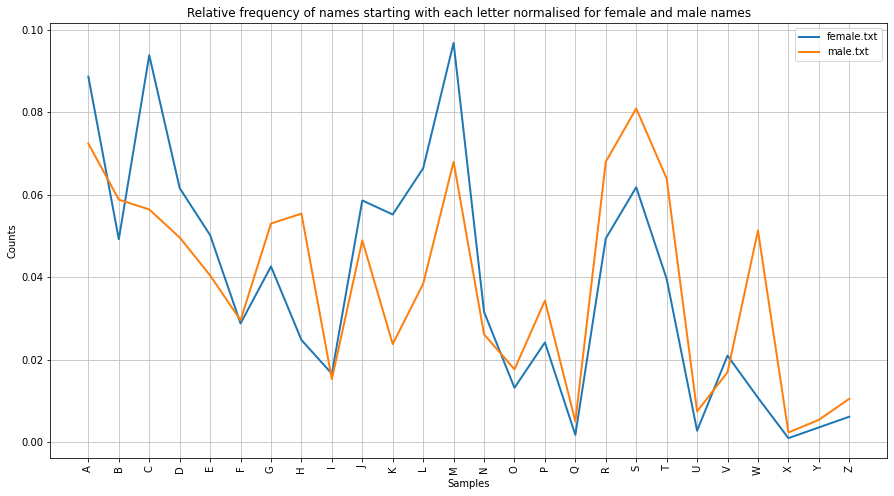

<AxesSubplot:title={'center':'Relative frequency of names starting with each letter normalised for female and male names'}, xlabel='Samples', ylabel='Counts'>

In [36]:
cfd_names_norm = cfd_names

for key, value in cfd_names_norm["female.txt"].items():
    cfd_names_norm["female.txt"][key] = value/n_female
    
for key, value in cfd_names_norm["male.txt"].items():
    cfd_names_norm["male.txt"][key] = value/n_male
plt.figure(figsize=(15, 8))
plt.title("Relative frequency of names starting with each letter normalised for female and male names")
cfd_names_norm.plot()



Names starting with the letters A, C-E, J-N and V make up a higher proportion of female than male names.

### Analyse modal frequency across genres in the brown corpus 

#### Q.2.11 
Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [37]:
cfd = nltk.ConditionalFreqDist((genre, word)
                              for genre in brown_genres
                              for word in nltk.corpus.brown.words(categories=genre))
modals = ["can","could","may","might","must","will", "would"]
modal_table = cfd.tabulate(conditions=brown_genres, samples=modals)
modal_table

                  can could   may might  must  will would 
      adventure    46   151     5    58    27    50   191 
 belles_lettres   246   213   207   113   170   236   392 
      editorial   121    56    74    39    53   233   180 
        fiction    37   166     8    44    55    52   287 
     government   117    38   153    13   102   244   120 
        hobbies   268    58   131    22    83   264    78 
          humor    16    30     8     8     9    13    56 
        learned   365   159   324   128   202   340   319 
           lore   170   141   165    49    96   175   186 
        mystery    42   141    13    57    30    20   186 
           news    93    86    66    38    50   389   244 
       religion    82    59    78    12    54    71    68 
        reviews    45    40    45    26    19    58    47 
        romance    74   193    11    51    45    43   244 
science_fiction    16    49     4    12     8    16    79 


For the **hobbies** and **learned genres** the **most popular modal** is **can**, which is consistent with the aim of such texts to **enable, empower and give agency to the reader** through knowledge acquisition.

In [38]:
# Creating a dataframe of word counts for more control when plotting
modals_by_genre = {}
for genre in brown_genres:
    modal_count = []
    for modal in modals:
        modal_count.append(cfd[genre][modal])
    modals_by_genre[genre] = modal_count
modals_by_genre = pd.DataFrame.from_dict(modals_by_genre, orient = "index", columns = modals)
modals_by_genre

,can,could,may,might,must,will,would
adventure,46,151,5,58,27,50,191
belles_lettres,246,213,207,113,170,236,392
editorial,121,56,74,39,53,233,180
fiction,37,166,8,44,55,52,287
government,117,38,153,13,102,244,120
hobbies,268,58,131,22,83,264,78
humor,16,30,8,8,9,13,56
learned,365,159,324,128,202,340,319
lore,170,141,165,49,96,175,186
mystery,42,141,13,57,30,20,186


In [39]:
list(modals_by_genre.index)[:5]

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government']

<AxesSubplot:xlabel='modals', ylabel='Count'>

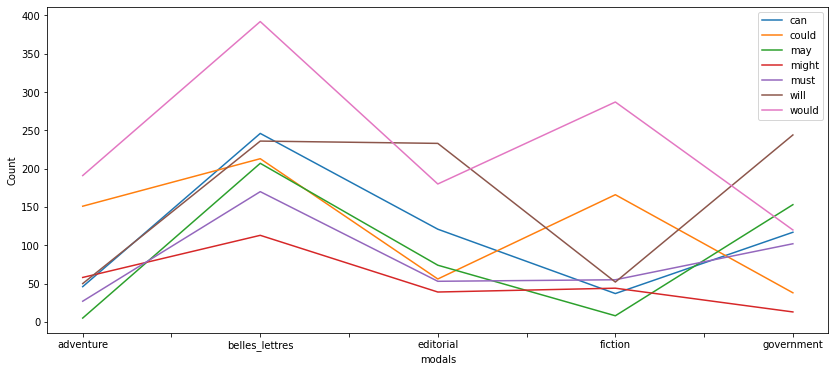

In [40]:
# To visualise modal for some of the genres
modals_by_genre.loc[list(modals_by_genre.index)[:5]].plot(figsize=(14,6), xlabel = "modals", ylabel="Count")



For adventure, belle_lettres and fiction the most popular modal is would - a word that implies possibility and potential, dependent on conditions, and that can be looking to the future or the past.
<br><br>
For editorial the most fequent modal is will, implying certainty, factual information and a focus on the future.
<br><br>

##### Comparing the use pronouns for different genres

In [41]:
cfd_2 = nltk.ConditionalFreqDist((genre, word)
                                 for genre in brown_genres
                                 for word in nltk.corpus.brown.words(categories=genre))

pronouns = ["I","we","you","they","he","she","it"]
modal_table = cfd.tabulate(conditions=brown_genres, samples=pronouns)
modal_table

                   I   we  you they   he  she   it 
      adventure  652   87  362  206  761  240  492 
 belles_lettres  845  398  188  488 1174  178 1059 
      editorial  201  167   83  148  268   41  386 
        fiction  511   85  236  230  813  280  458 
     government   97  112   74   92  120    0  218 
        hobbies  154  100  383  177  155   21  476 
          humor  239   32  131   70  146   58  162 
        learned  182  397   39  338  328   54  856 
           lore  265  132  209  303  541  232  566 
        mystery  583   62  340  106  670  219  515 
           news  179   77   55  205  451   42  363 
       religion  155  176  100  115  137   10  264 
        reviews   49   40   29   74  161   42  206 
        romance  951   78  456  168  702  496  573 
science_fiction   98   30   81   53  139   36  129 


* **Adventure, belles_letres, fiction, mystery, news and science fiction** use **"he"** most often, suggesting the **dominance of male characters within the narratives** of these genres.
<br><br>
* **Editorial, government, hobbies, learned, lore, religion and reviews** favour **"it"**, indicating the **focus on objects, concepts and ideas.**
<br><br>
* **Humour and romance** favour the **"I"** pronoun indicating **first-person narrative and a focus on the self**.

#### Q.2.12
The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [42]:
# To access all entries in CMU lexicon
entries = nltk.corpus.cmudict.entries()

# Create a list to store entry keys
all_entry_keys = []
for i in range(len(entries)):
    all_entry_keys.append(entries[i][0])

# Calculate total number of entries
n_entries = len(all_entry_keys)

# Calculate the number of unique entries
unique_entry_keys = sorted(set(all_entry_keys))
n_unique_entries = len(unique_entry_keys)

# Calculate the number of unique words with no punctuation
unique_word_keys = sorted(set(entry for entry in all_entry_keys if entry.isalpha()))
n_unique_word_entries = len(unique_word_keys)

print("The CMU dictionary contains {} total entries, with {} unique entries and {} unique entries that contain no punctuation.".format(n_entries,n_unique_entries,n_unique_word_entries))

#unique_entry_keys = set(all_entry_keys)
#print(len(unique_entry_keys))
#entries[:10]

The CMU dictionary contains 133737 total entries, with 123455 unique entries and 115533 unique entries that contain no punctuation.


In [43]:
#unique_entry_keys
prondict = nltk.corpus.cmudict.dict()

# Count the number of entries that have more than 1 pronounciation
count = 0
for key in unique_entry_keys:
    if len(prondict[key]) > 1:
        count += 1
        
print("{} entries have more than one pronounciation.".format(count))

9241 entries have more than one pronounciation.


#### Q.2.17
Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [44]:
# Import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
# still working on this
def common_words(text = text1, N = 20):
    # Create a list of English stopwords, from stopwords corpus
    s_words = stopwords.words('english')
    
    # Get word list from text
    words = list(text)
    
    # For every bigram check is is a word that is not a stopword and not punctuation
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in s_words]
    
    # Create a frequency distribution and return N most common words 
    fd = nltk.FreqDist(words)
    common_words = fd.most_common(N)
    return common_words


In [46]:
common_words(text = text4)

[('government', 600),
 ('people', 594),
 ('us', 502),
 ('must', 374),
 ('upon', 371),
 ('great', 346),
 ('world', 346),
 ('may', 343),
 ('states', 335),
 ('nation', 330),
 ('country', 322),
 ('shall', 316),
 ('every', 301),
 ('one', 272),
 ('peace', 259),
 ('new', 255),
 ('citizens', 248),
 ('power', 241),
 ('america', 240),
 ('public', 227)]

#### Q.2.18
Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [47]:
# Import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Define function that return N most frequent bigrams
def bigrams_top(text = text3, N = 50):
    
    # Create a list of English stopwords, from stopwords corpus
    s_words = stopwords.words('english')
    
    # Create bigrams and make a list
    bigrams = nltk.bigrams(text)
    bigrams = list(bigrams)
    
    # For every bigram check is is a word that is not a stopword and not punctuation
    sifted = [bigram for bigram in bigrams if bigram[0].isalpha() and bigram[0].lower() not in s_words and bigram[1].isalpha() and bigram[1].lower() not in s_words]

    # Create a frequency distribution and return N most common birgrams  
    fd = nltk.FreqDist(sifted)
    common_bigrams = fd.most_common(N)
    return common_bigrams

In [49]:
# Call funciton on text to view N most common bigrams
bigrams_top(text = text1, N = 20)

[(('Sperm', 'Whale'), 118),
 (('Moby', 'Dick'), 83),
 (('old', 'man'), 80),
 (('White', 'Whale'), 74),
 (('Captain', 'Ahab'), 61),
 (('sperm', 'whale'), 55),
 (('Right', 'Whale'), 38),
 (('ye', 'see'), 34),
 (('Captain', 'Peleg'), 32),
 (('cried', 'Ahab'), 32),
 (('white', 'whale'), 31),
 (('one', 'hand'), 28),
 (('cried', 'Stubb'), 23),
 (('one', 'side'), 22),
 (('every', 'one'), 21),
 (('let', 'us'), 20),
 (('never', 'mind'), 20),
 (('years', 'ago'), 18),
 (('New', 'Bedford'), 18),
 (('said', 'Stubb'), 18)]

## 3. Processing Raw Text


#### Q.3.1
Define a string s = 'colorless'. Write a Python statement that changes this to "colourless" using only the slice and concatenation operations.

In [50]:
s = "colorless"
s = s[:4]+"u"+s[4:]
s

'colourless'

#### Q.3.6
Describe the class of strings matched by the following regular expressions.

* a) [a-zA-Z]+
* b) [A-Z][a-z]*
* c) p[aeiou]{,2}t
* d) \d+(\.\d+)?
* e) ([^aeiou][aeiou][^aeiou])*
* f) \w+|[^\w\s]+
<br><br>

Test your answers using nltk.re_show().

In [51]:
import re
text_string = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')

In [52]:
# Any alphabetical string (lowercase or uppercase letters) of length 1 or greater
r_a = '[a-zA-Z]+'

# nltk.re_show(r_a,text_string[:300])

# Any string that starts with a capital letter followed by 0 or more lowercase letters
r_b = '[A-Z][a-z]*'

# nltk.re_show(r_b,text_string[:300])

# Any substring (syllabel) that contains the letter sequence: 
# lowercase p, followed by 0-2 lowercase vowels, and ending in lowercase t
r_c = 'p[aeiou]{,2}t'

#nltk.re_show(r_c, text_string[:300])
#print(re.findall(r_c, text_string[:300]))


# Matches the following sequence, only if it preceded by one or more digits:
# any character followed by one or more decimal digits
r_d = '\d+(.\d+)?'

#print(re.findall(r_d, nltk.corpus.nps_chat.raw()[:300]))

# A sequence that starts with a complement of a vowel, followed by a vowel, followed by the complement of a vowel,
# repeated 0 or more times, this will include empty strings
r_e = '([^aeiou][aeiou][^aeiou])*'
# nltk.re_show(r_e,text_string[:300])

# One or more alphanumeric characters [a-zA-Z0-9_] or 
# the complement of (an alphanumeric character or whitespace) repeated one or more times, i.e. any repeated punctuation.
r_f = '\w+|[^\w\s]+'

#nltk.re_show(r_f, text_string[:300])

#### Q.3.7
Write regular expressions to match the following classes of strings:

* A single determiner (assume that a, an, and the are the only determiners).
* An arithmetic expression using integers, addition, and multiplication, such as 2*3+8.

In [53]:
# Find a single determiner
det_string = "It's a fine day in the mountains and I brought an apple with me as a snack."
r_det = r"\s([Aa]{1})\s|\s([Aa]n)\s|\s([Tt]he)\s"
re.findall(r_det, det_string)

[('a', '', ''), ('', '', 'the'), ('', 'an', ''), ('a', '', '')]

In [54]:
test_string = "such as 2*3+8 = 20 and 50 * 31 = 18 and 5-2=3 and 55/5 = 11 are some examples of arithmetic expressions that are incorrect" 
r_arith = r"[0-9\+\-\*\/\=\s]{3,}"
re.findall(r_arith,test_string)

[' 2*3+8 = 20 ', ' 50 * 31 = 18 ', ' 5-2=3 ', ' 55/5 = 11 ']

#### Q.3.8
Write a utility function that takes a URL as its argument, and returns the contents of the URL, with all HTML markup removed. Use from urllib import request and then request.urlopen('http://nltk.org/').read().decode('utf8') to access the contents of the URL.

In [55]:
#import urllib.request, urllib.response, urllib.parse, urllib.error
import urllib.request
from bs4 import BeautifulSoup

def read_content_url(url = "http://nltk.org/", encoding ='utf8'):
    '''
    Function takes specified URL,
    and returns the content with all html markup removed.
    Assumes utf8 encoding.
    '''   

    response = urllib.request.urlopen(url)
    raw = response.read().decode(encoding)
    raw = BeautifulSoup(raw, "html.parser").get_text()
    print("Read file from {}.".format(url))
    print("Length of raw file is {} characters.".format(len(raw)))
    return raw


In [56]:
# The custom function can now be used to read in and tokenize text from any url
from nltk import word_tokenize
raw = read_content_url(url = "https://www.meta.com/gb/")
print(word_tokenize(raw))

Read file from https://www.meta.com/gb/.
Length of raw file is 120 characters.
['Meta', '–', 'VR', 'headsets', ',', 'smart', 'displays', 'and', 'AR', 'glasses']


In the case of https://www.meta.com/gb/ the function fails to read all the text displayed when the site is fully loaded, as the website loads content dynamically in response to user action (like scrolling down).

#### Q.3.14
Create a variable words containing a list of words. Experiment with words.sort() and sorted(words). What is the difference?

Here the words come from Human Compatible by Stuart Russell

In [57]:
# To make a list define an expression, remove punctuation, convert to list
converse = 'if some human preference had no effect whatsoever on any actual or hypothetical choice the human might make, then it would probably be meaningless to say that the preference exists'

# Remove punctuation
converse = re.sub(r'[,.!]+','',converse)

# Make a list from string
converse = converse.split()

print("The original list:\n", converse,"\n")
print("The list with sorted(list):\n",sorted(converse),"\n")
print("The original list:\n", converse,"\n")
print('\033[92m',"The sorted() method returns the sorted list (in alphabetical order by default, leaves the original list unchanged.","\n")

print('\033[90m',"The list with list.sort():\n",converse.sort(),"\n")
print("The original list:\n", converse,"\n")
print('\033[92m',"The sort() method returns the none object while sorting the original list.")



The original list:
 ['if', 'some', 'human', 'preference', 'had', 'no', 'effect', 'whatsoever', 'on', 'any', 'actual', 'or', 'hypothetical', 'choice', 'the', 'human', 'might', 'make', 'then', 'it', 'would', 'probably', 'be', 'meaningless', 'to', 'say', 'that', 'the', 'preference', 'exists'] 

The list with sorted(list):
 ['actual', 'any', 'be', 'choice', 'effect', 'exists', 'had', 'human', 'human', 'hypothetical', 'if', 'it', 'make', 'meaningless', 'might', 'no', 'on', 'or', 'preference', 'preference', 'probably', 'say', 'some', 'that', 'the', 'the', 'then', 'to', 'whatsoever', 'would'] 

The original list:
 ['if', 'some', 'human', 'preference', 'had', 'no', 'effect', 'whatsoever', 'on', 'any', 'actual', 'or', 'hypothetical', 'choice', 'the', 'human', 'might', 'make', 'then', 'it', 'would', 'probably', 'be', 'meaningless', 'to', 'say', 'that', 'the', 'preference', 'exists'] 

 The sorted() method returns the sorted list (in alphabetical order by default, leaves the original list unchang

In [58]:
# Another way to make a list of words from string, while removing punctuation
from nltk import word_tokenize
converse = "if some human preference had no effect whatsoever on any actual or hypothetical choice the human might make, then it would probably be meaningless to say that the preference exists"
list_converse = [w for w in word_tokenize(converse) if w.isalpha()]
print(sorted(list_converse))

['actual', 'any', 'be', 'choice', 'effect', 'exists', 'had', 'human', 'human', 'hypothetical', 'if', 'it', 'make', 'meaningless', 'might', 'no', 'on', 'or', 'preference', 'preference', 'probably', 'say', 'some', 'that', 'the', 'the', 'then', 'to', 'whatsoever', 'would']


#### Q.3.23
* Are you able to write a regular expression to tokenize text in such a way that the word don't is tokenized into do and n't? 
* Explain why this regular expression won't work: «n't|\w+».

In [59]:
check = "Don't do that, I said don't do that!"
r_dont = "([Dd]o)(n\'t)"
re.findall(r_dont,check)

[('Do', "n't"), ('do', "n't")]

The regular expression «n't|\w+» won't work as it will search for either "n't" or one or more alphanumeric characters in the set [a-zA-Z0-9_]

In [60]:
r_dont = "n't|\w+"
re.findall(r_dont,check)

['Don', 't', 'do', 'that', 'I', 'said', 'don', 't', 'do', 'that']

#### Q.3.30
Use the Porter Stemmer to normalize some tokenized text, calling the stemmer on each word. Do the same thing with the Lancaster Stemmer and see if you observe any differences.

In [61]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [62]:
# Compare the porter and lancaster stemmers for each token
tokens = text2[0:50]
compare = [(t, porter.stem(t), lancaster.stem(t)) for t in tokens]
for i in compare:
    print(i)

('[', '[', '[')
('Sense', 'sens', 'sens')
('and', 'and', 'and')
('Sensibility', 'sensibl', 'sens')
('by', 'by', 'by')
('Jane', 'jane', 'jan')
('Austen', 'austen', 'aust')
('1811', '1811', '1811')
(']', ']', ']')
('CHAPTER', 'chapter', 'chapt')
('1', '1', '1')
('The', 'the', 'the')
('family', 'famili', 'famy')
('of', 'of', 'of')
('Dashwood', 'dashwood', 'dashwood')
('had', 'had', 'had')
('long', 'long', 'long')
('been', 'been', 'been')
('settled', 'settl', 'settl')
('in', 'in', 'in')
('Sussex', 'sussex', 'sussex')
('.', '.', '.')
('Their', 'their', 'their')
('estate', 'estat', 'est')
('was', 'wa', 'was')
('large', 'larg', 'larg')
(',', ',', ',')
('and', 'and', 'and')
('their', 'their', 'their')
('residence', 'resid', 'resid')
('was', 'wa', 'was')
('at', 'at', 'at')
('Norland', 'norland', 'norland')
('Park', 'park', 'park')
(',', ',', ',')
('in', 'in', 'in')
('the', 'the', 'the')
('centre', 'centr', 'cent')
('of', 'of', 'of')
('their', 'their', 'their')
('property', 'properti', 'property

The Lancaster stemmer gives a shorter stem than the Porter stemmer in a few cases.

#### Q.3.32
Define a variable silly to contain the string: 'newly formed bland ideas are inexpressible in an infuriating
way'. (This happens to be the legitimate interpretation that bilingual English-Spanish speakers can assign to Chomsky's famous nonsense phrase, colorless green ideas sleep furiously according to Wikipedia). 
<br>
Now write code to perform the following tasks:
* Split silly into a list of strings, one per word, using Python's split() operation, and save this to a variable called bland.
* Extract the second letter of each word in silly and join them into a string, to get 'eoldrnnnna'.
* Combine the words in bland back into a single string, using join(). Make sure the words in the resulting string are separated with whitespace.
* Print the words of silly in alphabetical order, one per line.


In [63]:
silly = 'newly formed bland ideas are inexpressible in an infuriating way'

# Create a list of words from the phrase
bland = silly.split()

# Concatenate the second letter of every word, starting with an empty string
bland_str = ""
for word in bland:
    bland_str += word[1]
print(bland_str,"\n")

# Combine words in list to reform the original phrase
silly_remade = " ".join(bland)
print(silly_remade)
print(type(silly_remade),"\n")

# Print each word of phrase "silly" on new line
for word in sorted(silly.split()):
    print(word)


eoldrnnnna 

newly formed bland ideas are inexpressible in an infuriating way
<class 'str'> 

an
are
bland
formed
ideas
in
inexpressible
infuriating
newly
way


#### Categorising and Taggin Words with NLTK
Is covered in a [separate notebook](https://www.kaggle.com/ksenia5/nlp-categorising-and-tagging-words-with-nltk).

# References
* Bird, Steven, Edward Loper and Ewan Klein (2009). [Natural Language Processing with Python](https://www.nltk.org/book/).  O'Reilly Media Inc.
* Some [sample solutions to selected exercises](https://github.com/Sturzgefahr/Natural-Language-Processing-with-Python-Analyzing-Text-with-the-Natural-Language-Toolkit)
* More [sample solutions](https://github.com/shantanuraje/NLTKBook)
* Suart Russell, Human Compatible: Artificial Intelligence and the Problem of Control (Penguin Publishing Group, 2019)
* [Regular expressions](https://docs.python.org/3/howto/regex.html)
